In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir("/content/drive/")

In [ ]:
happiness_folder = "/content/drive/MyDrive/Happiness_PDF"
energy_folder = "/content/drive/MyDrive/Energy_PDF"
energy_file = "/content/drive/MyDrive/Energy_PDF/Energy consumption and income in G-7 countries.pdf"

In [ ]:
pip install PyPDF2 scikit-learn nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 2.5 MB/s eta 0:00:00


In [ ]:
import PyPDF2
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
def extract_text_from_pdf(file_path):
    with open(file_path, 'rb') as file:
        reader = PyPDF2.PdfReader(file)
        text = ''
        for page in reader.pages:
            text += page.extract_text() or ''  # Handle pages returning None
    return text

In [ ]:
def extract_texts_from_pdfs(directory_path):
    texts = []
    for filename in os.listdir(directory_path):
        if filename.endswith('.pdf'):
            file_path = os.path.join(directory_path, filename)
            texts.append(extract_text_from_pdf(file_path))
    return ' '.join(texts)

In [ ]:
energy_text = extract_texts_from_pdfs(energy_folder)
happiness_text = extract_texts_from_pdfs(happiness_folder)

In [ ]:
energy_text

'Journal of Policy Modeling 28 (2006) 739–750\nEnergy consumption and income in G-7 countries\nUgur Soytasa,∗, Ramazan Sarib,1\naDepartment of Business Administration, Middle East Technical University, Ankara 06531, Turkey\nbDepartment of Economics, Abant Izzet Baysal University, Bolu 14280, Turkey\nReceived 9 January 2006; received in revised form 30 January 2006; accepted 6 February 2006\nAbstract\nSeveral industrialized countries have signed the Kyoto Protocol, promising to reduce greenhouse gasses\n(GHG) emissions. To reduce or mitigate such emissions several policies including reducing energy con-sumption, increasing energy efﬁciency, decreasing energy intensity and forestation may be possible. Theviability and effectiveness of each policy may differ due to country speciﬁc factors. This paper tries toassess the impact of a change in energy consumption on income and vice versa in G-7 countries. We employmultivariate cointegration, error correction models and generalized variance de

In [ ]:
happiness_text

'CHRIS TKACH and SONJA LYUBOMIRSKY\nHOW DO PEOPLE PURSUE HAPPINESS?: RELATING\nPERSONALITY, HAPPINESS-INCREASING STRATEGIES,\nAND WELL-BEINGw\nABSTRACT. Five hundred ethnically diverse undergraduates reported their\nhappiness strategies – that is, activities undertaken to maintain or increase\nhappiness. Factor analysis extracted eight general strategies: Aﬃliation, Par-\ntying, Mental Control, Goal Pursuit, Passive Leisure, Active Leisure, Religion,\nand Direct Attempts at happiness. According to multiple regression analyses,\nthese strategies accounted for 52% of the variance in self-reported happiness\nand 16% over and above the variance accounted for by the Big Five person-\nality traits. The strongest unique predictors of current happiness were Mental\nControl (inversely related), Direct Attempts, Aﬃliation, Religion, Partying,\nand Active Leisure. Gender diﬀerences suggest that men prefer to engage in\nActive Leisure and Mental Control, whereas women favor Aﬃliation, Goal\nPursui

### Version 1 - TFiDf

In [ ]:


def preprocess_text(text):
    text = re.sub(r'\[.*?\]', '', text)  # Remove footnotes
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()

    return text

def remove_stop_words(text):
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return filtered_words

def word_frequency(words):
    return Counter(words)

def generate_word_cloud(word_freq):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()



In [ ]:

processed_text = preprocess_text(energy_text)
filtered_words = remove_stop_words(processed_text)

freq = word_frequency(filtered_words)
print(freq.most_common(20))

generate_word_cloud(freq.most_common(20))


Counter({'energy': 1563, 'consumption': 303, 'growth': 295, 'use': 271, 'countries': 177, 'economic': 166, 'quality': 159, 'development': 139, 'global': 139, 'life': 135, 'change': 132, 'environmental': 131, 'rate': 130, 'resources': 129, 'sustainable': 126, 'renewable': 122, 'efﬁciency': 115, 'emissions': 112, 'capital': 112, 'population': 103, 'world': 99, 'policy': 96, 'c': 91, 'production': 89, 'new': 86, 'econ': 86, 'increase': 84, 'also': 81, 'j': 78, 'environment': 77, 'index': 77, 'fuels': 76, 'however': 74, 'r': 74, 'per': 74, 'us': 71, 'power': 71, 'economics': 70, 'substitution': 69, 'results': 68, 'data': 68, 'sources': 67, 'impact': 66, 'years': 66, 'p': 66, 'may': 65, 'technology': 65, 'fig': 64, 'income': 63, 'buildings': 63, 'causality': 62, 'output': 62, 'fuel': 62, 'climate': 61, 'press': 61, 'due': 60, 'economy': 60, 'time': 60, 'sector': 60, 'electricity': 60, 'building': 60, 'variables': 59, 'resource': 59, 'online': 59, 'natural': 58, 'used': 58, 'gdp': 58, 'model

In [ ]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords

def preprocess_text(text):
    text = re.sub(r'\[.*?\]', '', text)  # Remove footnotes
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()
    return text

def remove_stop_words(text):
    stop_words = set(stopwords.words('english'))
    stop_words.add('also')
    stop_words.add('however')
    stop_words.add('research')
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return filtered_words

def word_frequency(words):
    return Counter(words)

def generate_word_cloud(word_freq):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()


{'energy': 1563, 'consumption': 303, 'growth': 295, 'countries': 177, 'economic': 166, 'quality': 159, 'development': 139, 'global': 139, 'life': 135, 'change': 132, 'environmental': 131, 'rate': 130, 'resources': 129, 'sustainable': 126, 'renewable': 122, 'efﬁciency': 115, 'emissions': 112, 'capital': 112, 'population': 103, 'world': 99, 'policy': 96, 'production': 89, 'econ': 86, 'increase': 84, 'environment': 77, 'index': 77, 'fuels': 76, 'power': 71, 'economics': 70, 'substitution': 69, 'results': 68, 'data': 68, 'sources': 67, 'impact': 66, 'years': 66, 'technology': 65, 'income': 63, 'buildings': 63, 'causality': 62, 'output': 62, 'fuel': 62, 'climate': 61, 'press': 61, 'economy': 60, 'time': 60, 'sector': 60, 'electricity': 60, 'building': 60, 'variables': 59, 'resource': 59}


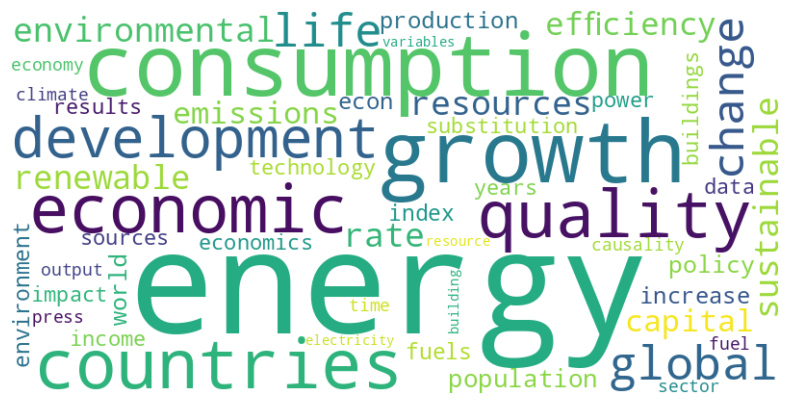

In [ ]:
processed_text = preprocess_text(energy_text)
filtered_words = remove_stop_words(processed_text)
freq = word_frequency(filtered_words)
filtered_freq = {word: count for word, count in freq.items() if len(word) > 3}
top_k_words = dict(sorted(filtered_freq.items(), key=lambda item: item[1], reverse=True)[:50])
print(top_k_words)
generate_word_cloud(top_k_words)

{'happiness': 669, 'wellbeing': 316, 'life': 314, 'social': 195, 'data': 166, 'health': 154, 'people': 152, 'study': 135, 'strategies': 130, 'satisfaction': 110, 'economic': 106, 'model': 104, 'happy': 100, 'journal': 89, 'time': 87, 'level': 85, 'subjective': 82, 'positive': 82, 'university': 82, 'studies': 81, 'evidence': 79, 'income': 78, 'variables': 76, 'personality': 74, 'individual': 74, 'table': 74, 'mental': 72, 'years': 71, 'psychology': 70, 'results': 69, 'control': 68, 'using': 67, 'effects': 67, 'individuals': 66, 'economics': 65, 'leisure': 64, 'traits': 64, 'environmental': 64, 'less': 63, 'strategy': 63, 'analysis': 62, 'used': 61, 'questions': 60, 'would': 59, 'well': 56, 'number': 56, 'work': 55, 'example': 54, 'national': 54, 'science': 54}


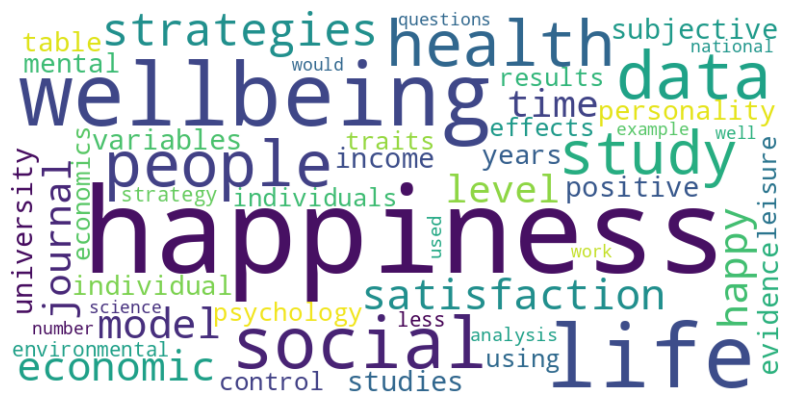

In [ ]:
processed_text = preprocess_text(happiness_text)
filtered_words = remove_stop_words(processed_text)
freq = word_frequency(filtered_words)
filtered_freq = {word: count for word, count in freq.items() if len(word) > 3}
top_k_words = dict(sorted(filtered_freq.items(), key=lambda item: item[1], reverse=True)[:50])
print(top_k_words)
generate_word_cloud(top_k_words)